In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
yelp=pd.read_csv('/content/drive/MyDrive/NLP/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp['text length']=yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: xlabel='stars', ylabel='text length'>

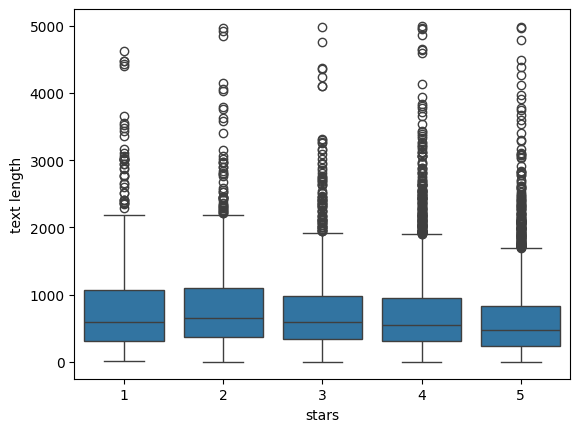

In [5]:
sns.boxplot(x='stars',y='text length',data=yelp)

<Axes: xlabel='stars', ylabel='count'>

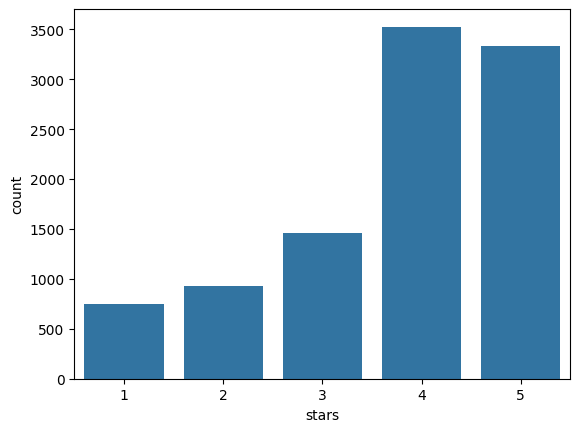

In [6]:
sns.countplot(x='stars',data=yelp)

In [7]:
yelp_class=yelp[(yelp['stars']==1)| (yelp['stars']==5)]

In [8]:
X=yelp_class['text']
y=yelp_class['stars']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [12]:
preds=nb.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           1       0.74      0.86      0.80       159
           5       0.97      0.95      0.96       863

    accuracy                           0.93      1022
   macro avg       0.86      0.90      0.88      1022
weighted avg       0.94      0.93      0.93      1022



In [14]:
print(confusion_matrix(preds,y_test))

[[137  22]
 [ 47 816]]


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer()),
                   ('tf',TfidfTransformer()),
                   ('model',MultinomialNB())
                  ])

In [16]:
from sklearn.model_selection import train_test_split
X=yelp_class['text']
y=yelp_class['stars']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [17]:
preds=pipeline.predict(x_test)

In [18]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.82      0.90      1022

    accuracy                           0.82      1022
   macro avg       0.50      0.41      0.45      1022
weighted avg       1.00      0.82      0.90      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
